# Detecting Dyslexia at an Early Stage using Convolutional Neural Network

### Importing Libraries

In [32]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

### Uploading the Dataset

In [33]:
def create_dataset_PIL(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(29,29,3))
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array , class_name
PIL_img_data, class_name=create_dataset_PIL("D:/HPE Project/Detecting-Dyslexia-at-an-early-stage/data/sample")

### Exploring the Dataset

In [34]:
print("Size of the images dataset: ", len(PIL_img_data))
print("Number of categories: ", len(set(class_name)))

Size of the images dataset:  25248
Number of categories:  3


In [35]:
print(type(PIL_img_data))
print(type(PIL_img_data[0]))
print(type(PIL_img_data[0][0]))
print(type(PIL_img_data[0][0][0]))
print(type(PIL_img_data[0][0][0][0]))

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float32'>


In [36]:
print(len(PIL_img_data))
print(len(PIL_img_data[0]))
print(len(PIL_img_data[0][0]))
print(len(PIL_img_data[0][0][0]))

25248
29
29
3


In [37]:
print(type(class_name))
print(type(class_name[0]))

<class 'list'>
<class 'str'>


#### Encoding class names to integral values

In [38]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
target_val = np.array(target_val)

In [39]:
print(len(class_name))
print(len(target_val))

25248
25248


#### Converting the PIL_img_data list to numpy array for neural network compatibility

In [40]:
PIL_img_data = np.array(PIL_img_data)

## Building the Model

### Preparing a basic implementation of CNN model

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape=(29, 29, 3)))
model.add(layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='softmax'))
model.add(layers.Flatten())
model.add(layers.Dense(3))

### Compiling the Model

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Fitting the Model

In [46]:
history = model.fit(PIL_img_data, target_val, epochs=20)

Epoch 1/20
789/789 [==============================] - 9s 10ms/step - loss: 0.5441 - accuracy: 0.6251
Epoch 2/20
789/789 [==============================] - 9s 12ms/step - loss: 0.5037 - accuracy: 0.6398
Epoch 3/20
789/789 [==============================] - 10s 12ms/step - loss: 0.5034 - accuracy: 0.6368
Epoch 4/20
789/789 [==============================] - 8s 10ms/step - loss: 0.5016 - accuracy: 0.6462
Epoch 5/20
789/789 [==============================] - 9s 11ms/step - loss: 0.5014 - accuracy: 0.6397
Epoch 6/20
789/789 [==============================] - 8s 10ms/step - loss: 0.5009 - accuracy: 0.6415
Epoch 7/20
789/789 [==============================] - 8s 10ms/step - loss: 0.5009 - accuracy: 0.6429
Epoch 8/20
789/789 [==============================] - 8s 11ms/step - loss: 0.5004 - accuracy: 0.6400
Epoch 9/20
789/789 [==============================] - 7s 9ms/step - loss: 0.5003 - accuracy: 0.6439
Epoch 10/20
789/789 [==============================] - 7s 9ms/step - loss: 0.5027 - accurac

## Analyzing the result

In [53]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

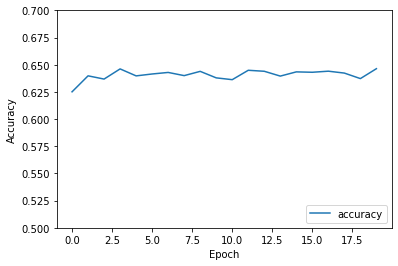

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 0.7])
plt.legend(loc='lower right')

## Additional Comments and Plans...
VG16
Transfer Learning